In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import u

# Data Generation

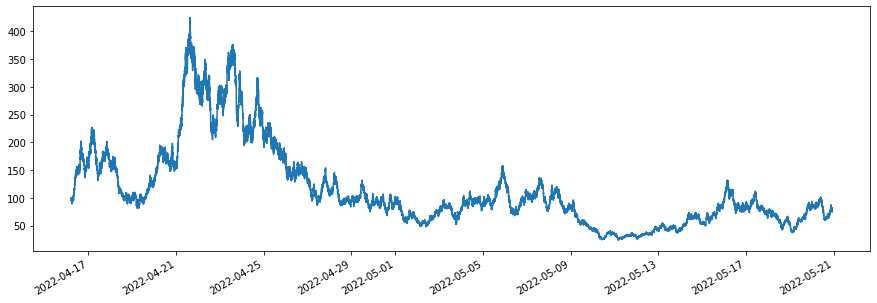

<AxesSubplot:>

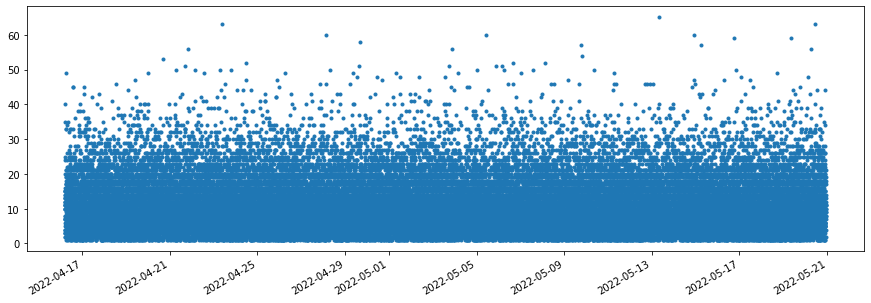

In [3]:
plt.rcParams["figure.figsize"] = (15, 5)

data = u.create_price_data(theta=0.00005, start_price=100, n_samples=50000)
data = u.add_volume_data(data, mu=10, var=50)

data["close"].plot.line()
plt.show()
data["volume"].plot(style=".")

# Tick Bars

In [4]:
tick_bars = bars.create_tick_bars(data, 60)
tick_bars.head()

,volume,open,close,high,low
index,,,,,
2022-04-16 05:10:54.816974,659.0,100.00,93.33,100.24,89.52
2022-04-16 06:10:54.816974,667.0,93.33,98.50,103.10,91.25
2022-04-16 07:10:54.816974,691.0,99.19,113.80,113.80,95.48
2022-04-16 08:10:54.816974,586.0,112.85,123.09,125.98,112.83
2022-04-16 09:10:54.816974,678.0,125.10,139.42,144.71,125.10


c:\users\maxga\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


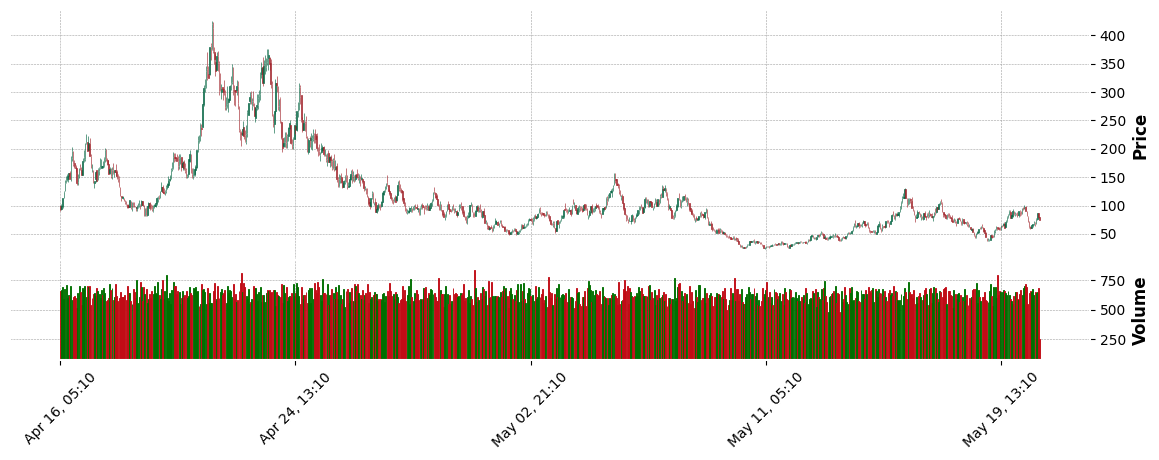

In [5]:
mplf.plot(tick_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Dollar Bars

In [6]:
data["dv"] = data["close"] * data["volume"]

In [7]:
mean_hourly_dv = np.mean(data.resample("H")["dv"].sum())
mean_hourly_dv

72303.12574340527

In [8]:
dv_bars = bars.create_dollar_volume_bars(data, mean_hourly_dv)
dv_bars.head()

,volume,open,close,high,low,dv
index,,,,,,
2022-04-16 05:10:54.816974,808.0,100.00,92.62,100.24,89.52,75814.92
2022-04-16 06:22:54.816974,755.0,92.79,96.23,103.10,92.35,74140.74
2022-04-16 07:35:54.816974,673.0,96.95,116.18,117.54,95.48,72373.24
2022-04-16 08:35:54.816974,591.0,115.53,133.72,136.95,114.52,73733.94
2022-04-16 09:28:54.816974,525.0,134.56,140.10,144.71,134.08,72791.80


c:\users\maxga\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


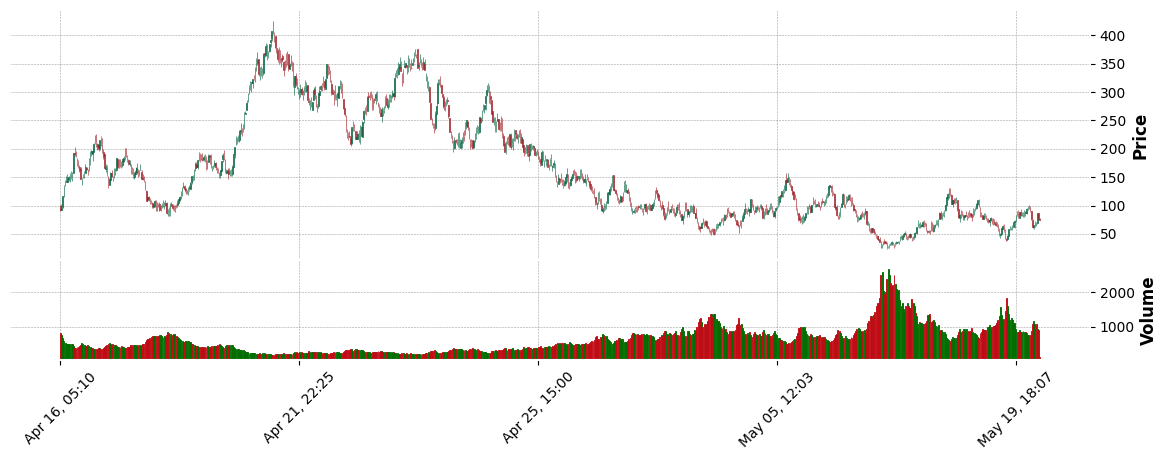

In [9]:
mplf.plot(dv_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Volume Bars

In [10]:
mean_hourly_volume = np.mean(data.resample("H")["volume"].sum())
mean_hourly_volume

628.7637889688249

In [11]:
v_bars = bars.create_volume_bars(data, mean_hourly_volume)
v_bars.head()

,volume,open,close,high,low,dv
index,,,,,,
2022-04-16 05:10:54.816974,636.0,100.00,92.70,100.24,89.52,59894.04
2022-04-16 06:07:54.816974,646.0,92.62,101.28,103.10,91.25,62163.85
2022-04-16 07:04:54.816974,634.0,102.10,107.54,107.54,95.48,64166.40
2022-04-16 08:02:54.816974,629.0,107.46,122.24,125.98,107.07,73046.92
2022-04-16 09:04:54.816974,633.0,122.95,139.88,144.71,121.87,85382.30


c:\users\maxga\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


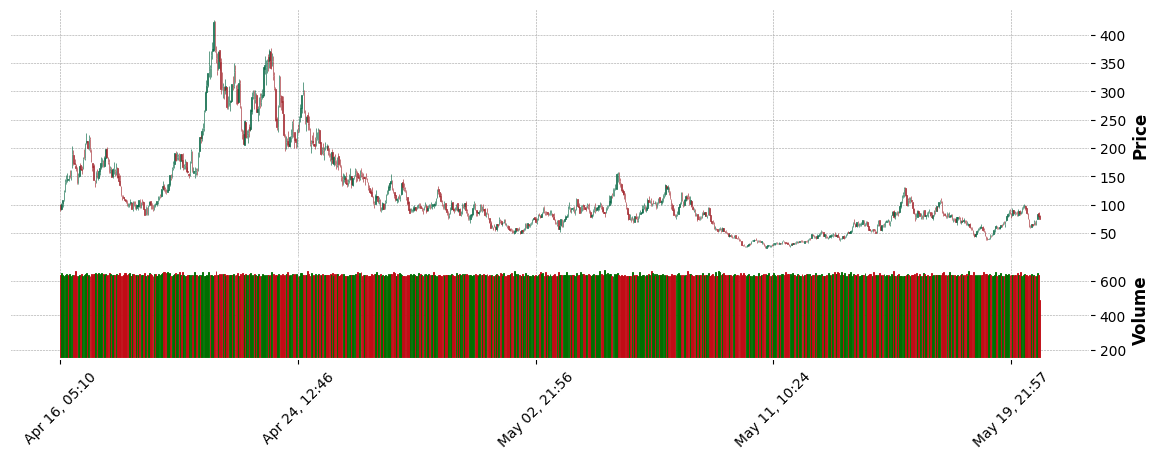

In [12]:
mplf.plot(v_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Weekly Counts

<AxesSubplot:xlabel='index'>

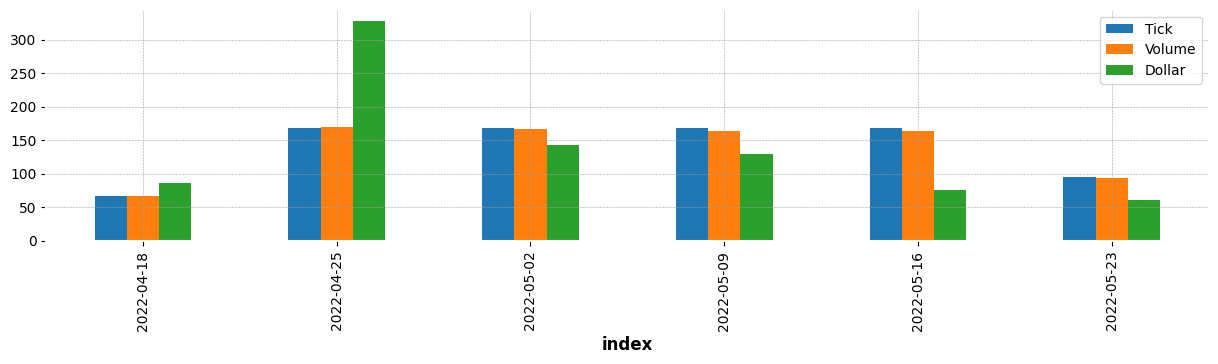

In [13]:
tick_bar_counts = tick_bars.resample("W-MON")["close"].count()
v_bar_counts = v_bars.resample("W-MON")["close"].count()
dv_bar_counts = dv_bars.resample("W-MON")["close"].count()

count_df = pd.concat([tick_bar_counts, v_bar_counts, dv_bar_counts], axis=1)
count_df.columns = ["Tick", "Volume", "Dollar"]
count_df.index = count_df.index.strftime("%Y-%m-%d")

count_df.plot(kind="bar", figsize=[15, 3])

# Autocorrelations

In [14]:
def add_returns(data):
    data["return"] = data["close"].divide(data["close"].shift(1)) - 1
    return data


tick_autocorr = add_returns(tick_bars)["return"].autocorr()
v_autocorr = add_returns(v_bars)["return"].autocorr()
dv_autocorr = add_returns(dv_bars)["return"].autocorr()

pd.DataFrame(
    {
        "Bar Type": ["Tick", "Volume", "Dollar Volume"],
        "Auto Correlation": [tick_autocorr, v_autocorr, dv_autocorr],
    }
)

,Bar Type,Auto Correlation
0,Tick,0.011669
1,Volume,0.008077
2,Dollar Volume,-0.025967
